We import bybullet and pybullet data

In [22]:
import pybullet as p
import pybullet_data
import matplotlib.pyplot as plt

Connection to the physics server

In [2]:
p.connect(p.DIRECT)

0

In [5]:
p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [6]:
p.loadURDF("plane.urdf")

0

In [8]:
r2d2 = p.loadURDF("r2d2.urdf", [0, 0, 0.5])

In [9]:
p.getNumBodies()

2

In [10]:
for i in range(p.getNumJoints(r2d2)):
    joint_info = p.getJointInfo(r2d2, i)
    print("Joint {}, name {}".format(joint_info[0], joint_info[1]))
# end for

Joint 0, name b'base_to_right_leg'
Joint 1, name b'right_base_joint'
Joint 2, name b'right_front_wheel_joint'
Joint 3, name b'right_back_wheel_joint'
Joint 4, name b'base_to_left_leg'
Joint 5, name b'left_base_joint'
Joint 6, name b'left_front_wheel_joint'
Joint 7, name b'left_back_wheel_joint'
Joint 8, name b'gripper_extension'
Joint 9, name b'left_gripper_joint'
Joint 10, name b'left_tip_joint'
Joint 11, name b'right_gripper_joint'
Joint 12, name b'right_tip_joint'
Joint 13, name b'head_swivel'
Joint 14, name b'tobox'


In [11]:
p.setGravity(0, 0, -9.8)

In [12]:
precision = 5

In [13]:
for i in range(10):
    pos, orn = p.getBasePositionAndOrientation(r2d2)
    posmsg='pos = {posx:.{prec}f},{posy:.{prec}f},{posz:.{prec}f}   '.format(posx=pos[0],posy=pos[1],posz=pos[2], prec=precision)
    print(posmsg)
    p.stepSimulation()
# end for

pos = 0.00000,0.00000,0.50000   
pos = 0.00000,0.00000,0.49983   
pos = 0.00000,0.00000,0.49949   
pos = 0.00000,0.00000,0.49898   
pos = 0.00000,0.00000,0.49830   
pos = 0.00000,0.00000,0.49745   
pos = 0.00000,0.00000,0.49643   
pos = 0.00000,0.00000,0.49524   
pos = 0.00000,0.00000,0.49388   
pos = 0.00000,0.00000,0.49235   


In [14]:
p.stepSimulation()

()

In [15]:
cam_target_pos = [0,0,0]
camera_up = [0,0,1]
camera_pos = [1,1,1]

In [36]:
pitch = -10.0
yaw = 60
roll=0
upAxisIndex = 2
camDistance = 4
pixelWidth = 320
pixelHeight = 200
nearPlane = 0.01
farPlane = 100
fov = 60

In [37]:
viewMatrix = p.computeViewMatrixFromYawPitchRoll(cam_target_pos, camDistance, yaw, pitch, roll, upAxisIndex)
aspect = pixelWidth / pixelHeight
projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

In [38]:
img_arr = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix, projectionMatrix, shadow=1, lightDirection=[1,1,1])

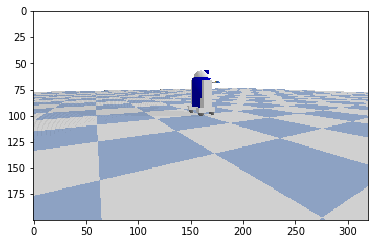

In [39]:
w=img_arr[0] #width of the image, in pixels
h=img_arr[1] #height of the image, in pixels
rgb=img_arr[2] #color data RGB
plt.imshow(rgb,interpolation='none')
plt.draw()
plt.show()